## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [28]:
import os
import keras as K

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [29]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [30]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## Code Here
## 建立你的神經網路

In [31]:
def build_mlp():
    input_layer = K.layers.Input([x_train.shape[-1]])
    x   = K.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x   = K.layers.Dense(units = 256, activation = 'relu')(x)
    x   = K.layers.Dense(units = 128, activation = 'relu')(x)
    out = K.layers.Dense(units =  10, activation = 'softmax')(x) 
   
    model = K.models.Model(inputs = [input_layer], outputs = [out])
    return model


In [32]:
model = build_mlp()

## Compile 模型

In [39]:
# 用 Keras as K 內建方法檢視模型各層參數量
model.summary()

#optimizer = K.optimizers.Adam(lr = 0.001)
optimizer = K.optimizers.SGD(lr = 0.001)

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


## 設定要訓練的 Epoch 數


In [40]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.1716 - acc: 0.9437 - val_loss: 3.1443 - val_acc: 0.5103
Epoch 2/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.1341 - acc: 0.9607 - val_loss: 3.1521 - val_acc: 0.5102
Epoch 3/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.1221 - acc: 0.9658 - val_loss: 3.1567 - val_acc: 0.5104
Epoch 4/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.1158 - acc: 0.9691 - val_loss: 3.1621 - val_acc: 0.5104
Epoch 5/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.1118 - acc: 0.9706 - val_loss: 3.1666 - val_acc: 0.5108
Epoch 6/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.1091 - acc: 0.9720 - val_loss: 3.1690 - val_acc: 0.5118
Epoch 7/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.1070 - acc: 0.9731 - val_loss: 3.1725 - 

50000/50000 [==============================] - 2s 45us/step - loss: 0.0854 - acc: 0.9800 - val_loss: 3.2660 - val_acc: 0.5140
Epoch 60/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.0852 - acc: 0.9801 - val_loss: 3.2665 - val_acc: 0.5140
Epoch 61/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.0850 - acc: 0.9801 - val_loss: 3.2691 - val_acc: 0.5139
Epoch 62/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.0849 - acc: 0.9802 - val_loss: 3.2701 - val_acc: 0.5137
Epoch 63/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.0847 - acc: 0.9803 - val_loss: 3.2724 - val_acc: 0.5139
Epoch 64/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.0845 - acc: 0.9804 - val_loss: 3.2724 - val_acc: 0.5146
Epoch 65/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.0843 - acc: 0.9805 - val_loss: 3.2741 - val_acc: 0.5139
Epoch 66/100
50000/50000 [==============

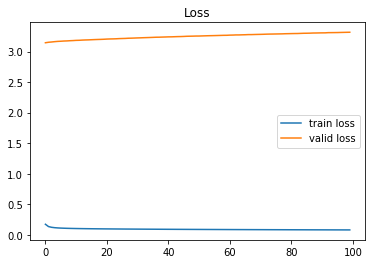

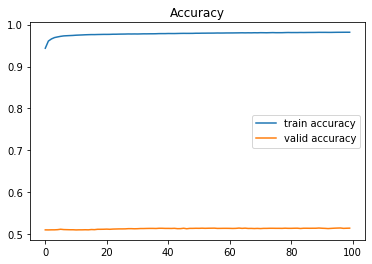

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()